In [3]:
import os

# Desativa as otimizações do oneDNN para sumir com o log
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from rn_keras import RnKeras

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.20.0


In [4]:
# --- DADOS FICTÍCIOS PARA TESTE ---
# A entrada esperada é de 16384 features (ex: imagem 128x128 achatada)
INPUT_PIXELS = 16384
NUM_SAMPLES = 100 # Quantidade de exemplos para o teste

# Gerando dados aleatórios para simular X_train e Y_train
X_train = np.random.random((NUM_SAMPLES, INPUT_PIXELS))
Y_train = np.random.randint(2, size=(NUM_SAMPLES, 1)) # Classes 0 ou 1

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de Y_train: {Y_train.shape}")

Shape de X_train: (100, 16384)
Shape de Y_train: (100, 1)


In [6]:
# Instanciando a classe
rede_neural = RnKeras()

# Treinando o modelo
# Nota: Redes densas com 8193 neurônios consomem MUITA memória RAM.
# Se o kernel do notebook travar, tente reduzir o 'units' na classe acima.
history_train = rede_neural.train(X_train, Y_train, epochs=5)

C:\Users\soste\AppData\Local\pypoetry\Cache\virtualenvs\curso-4-1-visao-computacional-guia-complet-w7ZThdhu-py3.12\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Iniciando treinamento...
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5000 - loss: 220.0090
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4600 - loss: 46.6212
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 999ms/step - accuracy: 0.5800 - loss: 3.7192
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4600 - loss: 2.8253
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5800 - loss: 0.8829
Modelo salvo em: rn_bart_home.keras


Modelo e histórico carregados com sucesso.


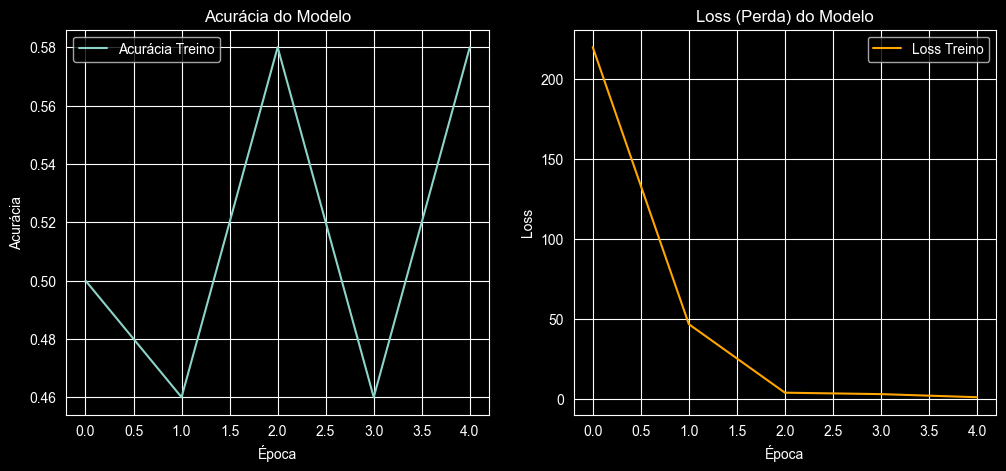

In [7]:
# Carregando o modelo salvo (teste da função load_nr)
model_loaded, history_data = rede_neural.load_nr()

if history_data:
    # Plotando a Acurácia e o Loss
    plt.figure(figsize=(12, 5))

    # Gráfico de Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history_data['accuracy'], label='Acurácia Treino')
    plt.title('Acurácia do Modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend()

    # Gráfico de Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_data['loss'], label='Loss Treino', color='orange')
    plt.title('Loss (Perda) do Modelo')
    plt.ylabel('Loss')
    plt.xlabel('Época')
    plt.legend()

    plt.show()

In [9]:
model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,151,825 (2.25 GB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 402,767,884 (1.50 GB)